In [6]:
# https://learn.qiskit.org/course/introduction/grovers-search-algorithm

In [11]:
path = 'assets/3sat.dimacs'
with open(path, 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


In [12]:
# NOTE: python3.11+ does not work: 2023-09-29
!pip install tweedledum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.8/961.8 kB 9.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('assets/3sat.dimacs')
oracle.draw()

q_0: ─o────────────o──────
      │ ┌───┐┌───┐ │ ┌───┐
q_1: ─■─┤ Z ├┤ X ├─■─┤ X ├
      │ ├───┤└───┘   └───┘
q_2: ─o─┤ Z ├─────────────
        └───┘

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [4]:
# steps 2 & 3 of Grover's algorithm
# step2: oracle-circuit
# step3: diffuser

from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

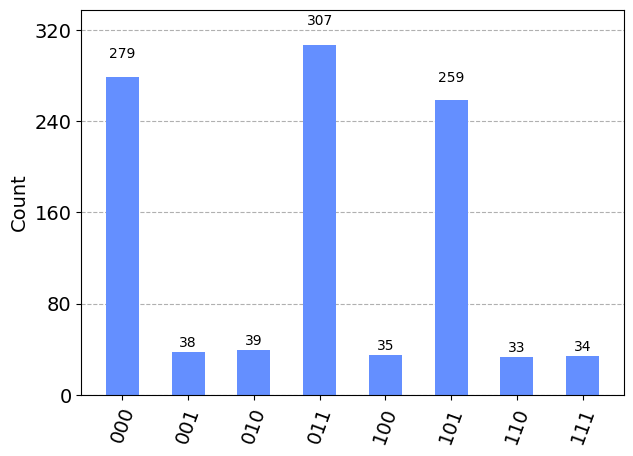

In [7]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)